In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import scipy as stats

# Definir rutas relativas (notebook está en /notebooks)
BASE_DIR = Path('..')
DATA_DIR = BASE_DIR / 'data' / 'raw'
df = pd.read_csv(DATA_DIR / 'games.csv')

df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [3]:
print(f" Size: {df.size}")
print(f" Shape: {df.shape}")

 Size: 320928
 Shape: (20058, 16)


In [4]:
print(f"- Duplicados: {df.duplicated().sum()}")
print(" ")
print("- Valores Nulos:")
print(df.isnull().sum())

- Duplicados: 429
 
- Valores Nulos:
id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64


In [5]:
df["created_at"] = pd.to_datetime(df["created_at"], errors='coerce', unit='ms')
df["last_move_at"] = pd.to_datetime(df["last_move_at"], errors='coerce', unit='ms')
print(df[["created_at", "last_move_at"]].head())

           created_at        last_move_at
0 2017-08-31 20:06:40 2017-08-31 20:06:40
1 2017-08-30 21:53:20 2017-08-30 21:53:20
2 2017-08-30 21:53:20 2017-08-30 21:53:20
3 2017-08-30 16:20:00 2017-08-30 16:20:00
4 2017-08-29 18:06:40 2017-08-29 18:06:40


In [6]:
print(f"- Duplicados: {df.duplicated().sum()}")
print(" ")
print("- Valores Nulos:")
print(df.isnull().sum())

- Duplicados: 429
 
- Valores Nulos:
id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              20058 non-null  object        
 1   rated           20058 non-null  bool          
 2   created_at      20058 non-null  datetime64[ns]
 3   last_move_at    20058 non-null  datetime64[ns]
 4   turns           20058 non-null  int64         
 5   victory_status  20058 non-null  object        
 6   winner          20058 non-null  object        
 7   increment_code  20058 non-null  object        
 8   white_id        20058 non-null  object        
 9   white_rating    20058 non-null  int64         
 10  black_id        20058 non-null  object        
 11  black_rating    20058 non-null  int64         
 12  moves           20058 non-null  object        
 13  opening_eco     20058 non-null  object        
 14  opening_name    20058 non-null  object        
 15  op

In [8]:
print(f"Shape: {df.shape}")

print("Columnas")

for col in df.columns:
    print(f" - {col}")

Shape: (20058, 16)
Columnas
 - id
 - rated
 - created_at
 - last_move_at
 - turns
 - victory_status
 - winner
 - increment_code
 - white_id
 - white_rating
 - black_id
 - black_rating
 - moves
 - opening_eco
 - opening_name
 - opening_ply


In [9]:
df[["white_rating","black_rating"]].describe()

,white_rating,black_rating
count,20058.000000,20058.000000
mean,1596.631868,1588.831987
std,291.253376,291.036126
min,784.000000,789.000000
25%,1398.000000,1391.000000
50%,1567.000000,1562.000000
75%,1793.000000,1784.000000
max,2700.000000,2723.000000


# Exploración

## 1. Análisis general del dataset

### Distribución de partidas:

- ¿Cuántas partidas están calificadas (rated) vs no calificadas?


In [10]:

df["rated"] = df["rated"].map({True: "Classified", False: "Not Classified"})
df_rated = df["rated"].value_counts().reset_index()
df_rated

,rated,count
0,Classified,16155
1,Not Classified,3903


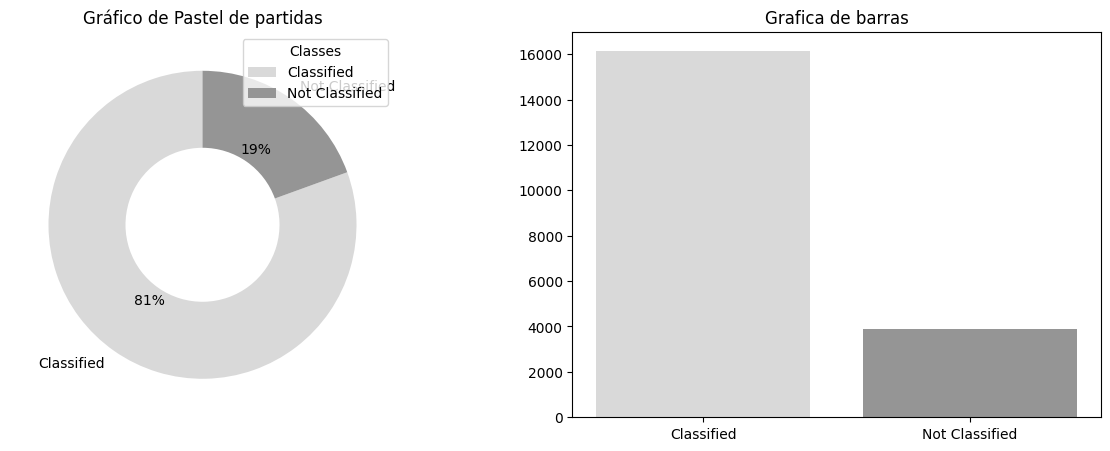

In [11]:
greys_palette = sns.color_palette("Greys", 3)

count = df_rated["count"]
labels = df_rated["rated"]

color_map = {
    'Classified': greys_palette[0],
    'Not Classified': greys_palette[1]       
}


pie_colors = [color_map[label] for label in labels]

fig, ax = plt.subplots(1,2,figsize=(15, 5))

wedges, texts, autotexts = ax[0].pie(
    count,
    labels=labels,
    colors=pie_colors,
    startangle=90,
    autopct='%.0f%%',
    wedgeprops=dict(width=0.5),
)

ax[0].legend(wedges, labels, title="Classes")
ax[0].set_title('Gráfico de Pastel de partidas')


ax[1].bar(labels,count,color=pie_colors)
ax[1].set_title('Grafica de barras')


plt.show()


- ¿Cómo se distribuyen las partidas a lo largo del tiempo (created_at)? ¿Hay temporadas de mayor actividad?

In [12]:
df_date = df["created_at"].dt.date.value_counts().sort_index()
df_date = df_date.reset_index()
df_date.head()



df_date.columns = ["date", "games"]


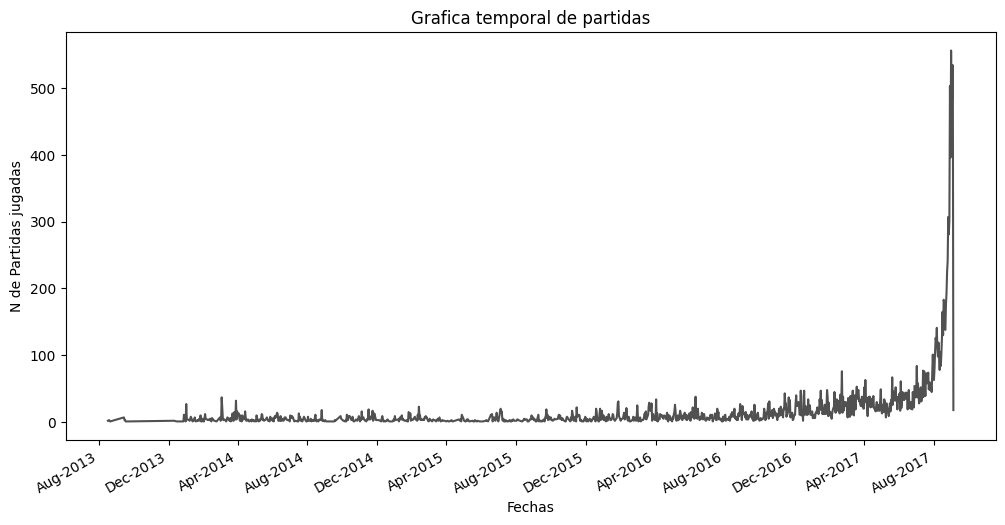

In [13]:


fig, ax  = plt.subplots(figsize=(12,6))

half_year_locator = mdates.MonthLocator(interval=4)
year_month_farmatter = mdates.DateFormatter("%b-%Y")

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_farmatter)

ax.plot(df_date["date"],df_date["games"], color = greys_palette[2])
ax.set_title("Grafica temporal de partidas")
ax.set_xlabel("Fechas")
ax.set_ylabel("N de Partidas jugadas")
ax.set_label("Partidas por año")
fig.autofmt_xdate()

### Duración de partidas:

- ¿Cuál es la distribución del número de movimientos (turns)?
- ¿Existen partidas extremadamente cortas o muy largas?

Concepto clave: Boxplots y percentiles para detectar outliers.

In [14]:
df_turns = df_turns = df["turns"]
df_turn = df_turns.describe()
df_turn.columns = ["medidas", "turns"]

print(df_turn)


count    20058.000000
mean        60.465999
std         33.570585
min          1.000000
25%         37.000000
50%         55.000000
75%         79.000000
max        349.000000
Name: turns, dtype: float64


<Axes: title={'center': 'Histograma: Cantidad de turnos'}, xlabel='turns', ylabel='Count'>

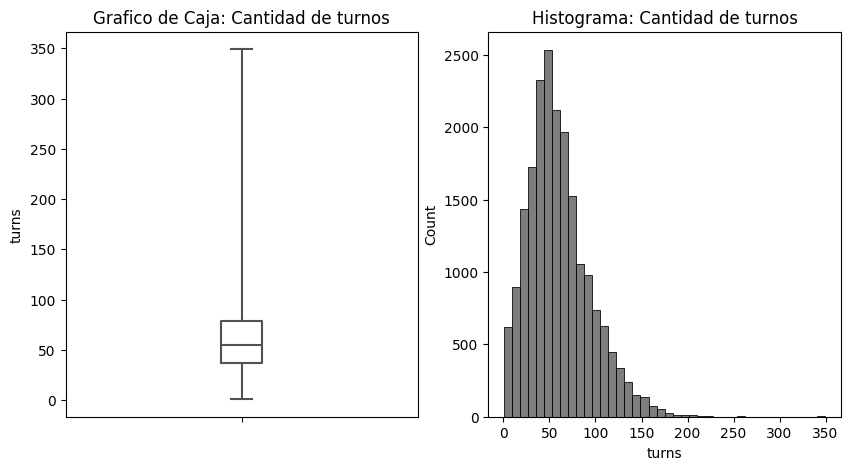

In [15]:
fig, ax = plt.subplots(1,2,figsize=(10,5))


ax[0].set_title("Grafico de Caja: Cantidad de turnos")
sns.boxplot(data=df, y="turns", whis=(0,100), color=greys_palette[2], width=.13, fill=False, gap=.1, ax=ax[0])

ax[1].set_title("Histograma: Cantidad de turnos")
sns.histplot(data=df, x="turns",bins = 40, kde=False, ax=ax[1],discrete=False, color=greys_palette[2])

## 2. Resultados y Victorias



### Tipos de victoria:

- ¿Qué proporción de partidas termina en “mate”, “resignación” o “abandono”?

In [16]:
df_victory_status = df["victory_status"].value_counts().sort_index().reset_index()
df_victory_status.columns = ["type_victory","games"]

df_victory_status

,type_victory,games
0,draw,906
1,mate,6325
2,outoftime,1680
3,resign,11147


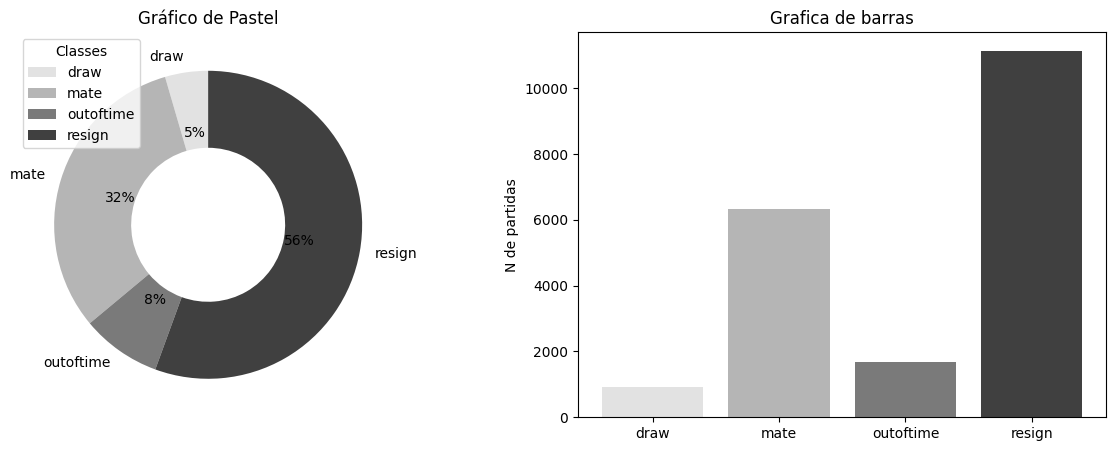

In [17]:

count = df_victory_status["games"]
labels = df_victory_status["type_victory"]

greys_palette = sns.color_palette("Greys", 4)

color_map = {
    'draw': greys_palette[0],
    'mate': greys_palette[1],
    'outoftime': greys_palette[2],
    'resign': greys_palette[3]       
}

pie_colors = [color_map[label] for label in labels]

fig, ax = plt.subplots(1,2,figsize=(15, 5))

wedges, texts, autotexts = ax[0].pie(
    count,
    labels=labels,
    colors=pie_colors,
    startangle=90,
    autopct='%.0f%%',
    wedgeprops=dict(width=0.5),
)

ax[0].legend(wedges, labels, title="Classes")
ax[0].set_title('Gráfico de Pastel')


ax[1].bar(labels,count,color=pie_colors)
ax[1].set_title('Grafica de barras')
ax[1].set_ylabel("N de partidas")


plt.show()

### Ganadores por color:

- ¿Qué color (blancas o negras) gana más frecuentemente?
- ¿Cómo cambia esta proporción según si la partida es rated o no?

Concepto: Tablas cruzadas y gráficos de barras apiladas.

In [18]:
df_winner = df["winner"].value_counts().reset_index()
df_winner

,winner,count
0,white,10001
1,black,9107
2,draw,950


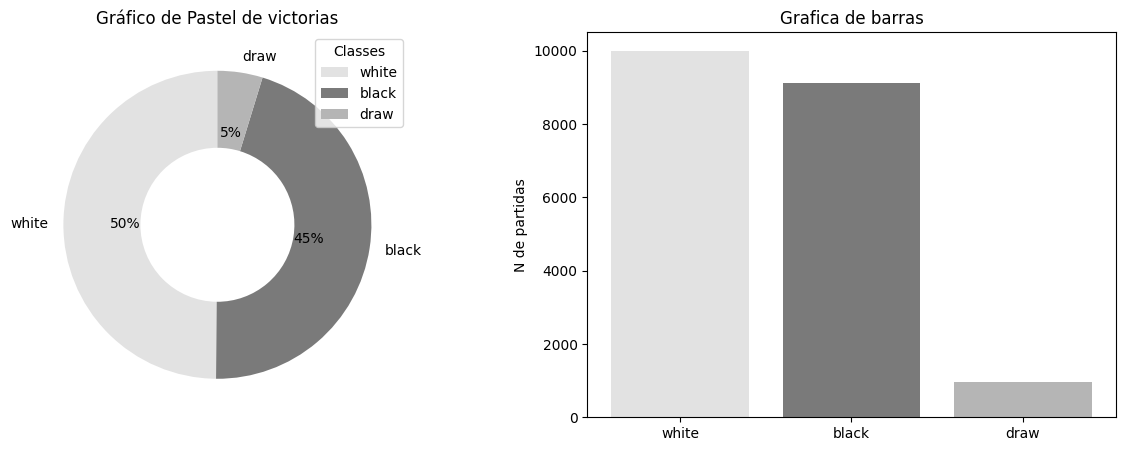

In [19]:
count = df_winner["count"]
labels = df_winner["winner"]

color_map = {
    'white': greys_palette[0], 
    'black': greys_palette[2], 
    'draw': greys_palette[1]       
}


pie_colors = [color_map[label] for label in labels]


fig, ax = plt.subplots(1,2,figsize=(15, 5))

wedges, texts, autotexts = ax[0].pie(
    count,
    labels=labels,
    colors=pie_colors,
    startangle=90,
    autopct='%.0f%%',
    wedgeprops=dict(width=0.5),
)

ax[0].legend(wedges, labels, title="Classes")
ax[0].set_title('Gráfico de Pastel de victorias')


ax[1].bar(labels,count,color=pie_colors)
ax[1].set_title('Grafica de barras')
ax[1].set_ylabel("N de partidas")


plt.show()

In [20]:
filtro = df["winner"] != "draw"

tabla_cruzada = pd.crosstab(
    df.loc[filtro, "winner"],
    df.loc[filtro, "victory_status"]
)

tabla_cruzada




victory_status,mate,outoftime,resign
winner,,,
black,2981,823,5303
white,3344,813,5844


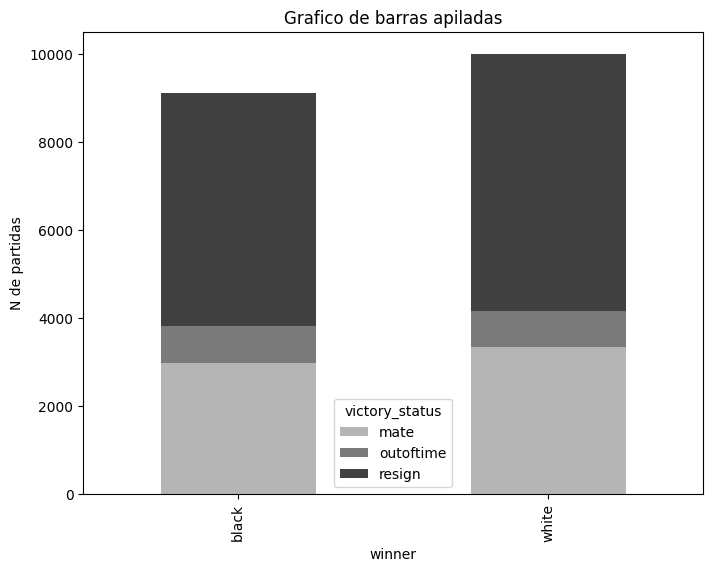

In [21]:
fig, ax = plt.subplots(figsize=(8,6))
tabla_cruzada.plot(
    ax=ax, 
    kind='bar', 
    stacked=True,
    color=[greys_palette[1],greys_palette[2],greys_palette[3]])
ax.set_title("Grafico de barras apiladas")
ax.set_ylabel("N de partidas")
plt.show()

In [22]:
rated = df[(df["rated"] == "Classified") & (df["winner"] != "draw")]
not_rated = df[(df["rated"] == "Not Classified") & (df["winner"] != "draw")]

tabla_cruzada_rated = pd.crosstab(
    rated["winner"],
    rated["victory_status"]
)

tabla_cruzada_not_rated = pd.crosstab(
    not_rated["winner"],
    not_rated["victory_status"]
)

print("Classified")
print(tabla_cruzada)
print(" ")
print("Not Classified")
print(tabla_cruzada_not_rated)

Classified
victory_status  mate  outoftime  resign
winner                                 
black           2981        823    5303
white           3344        813    5844
 
Not Classified
victory_status  mate  outoftime  resign
winner                                 
black            569        144    1010
white            610        171    1168


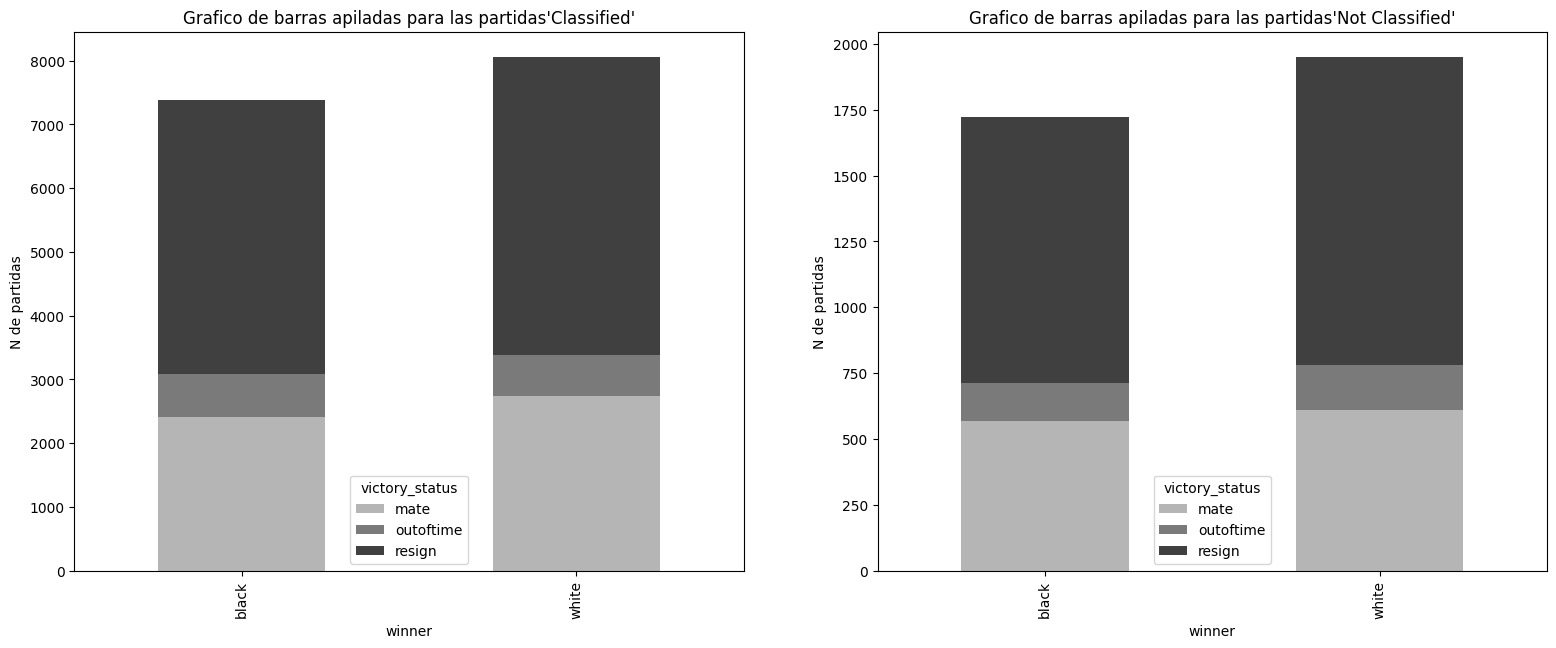

In [23]:
fig, ax = plt.subplots(1,2, figsize=(19,7))

tabla_cruzada_rated.plot(
    ax=ax[0], 
    kind='bar', 
    stacked=True,
    color=[greys_palette[1],greys_palette[2],greys_palette[3]])
ax[0].set_title("Grafico de barras apiladas para las partidas'Classified'")
ax[0].set_ylabel("N de partidas")

tabla_cruzada_not_rated.plot(
    ax=ax[1], 
    kind='bar', 
    stacked=True,
    color=[greys_palette[1],greys_palette[2],greys_palette[3]])
ax[1].set_title("Grafico de barras apiladas para las partidas'Not Classified'")
ax[1].set_ylabel("N de partidas")


plt.show()

### Diferencias de rating

- Analizar influencia de la diferencia de rating (white_rating - black_rating) en el resultado

In [24]:
df[["white_rating", "black_rating"]].corr()

,white_rating,black_rating
white_rating,1.000000,0.634171
black_rating,0.634171,1.000000


Text(0, 0.5, 'Elo negras')

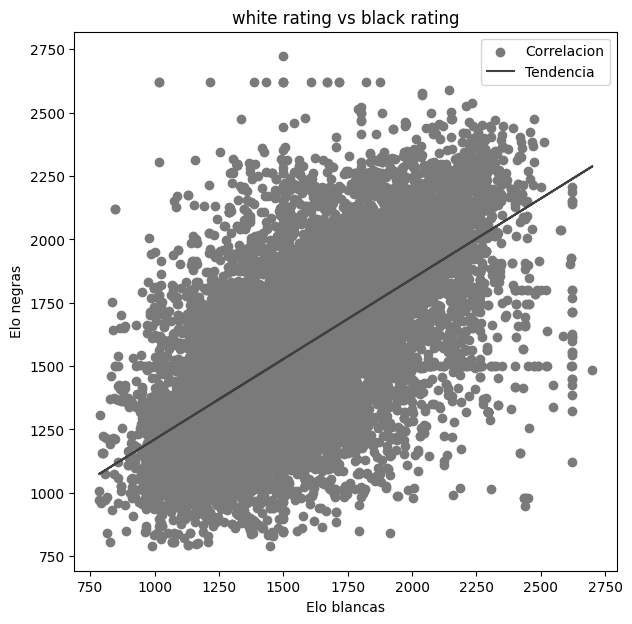

In [25]:

fig, ax = plt.subplots(figsize=(7,7))




ax.scatter(data=df, x="white_rating", y="black_rating", color=greys_palette[2], label = "Correlacion")

m,b = np.polyfit(df["white_rating"],df["black_rating"],1)

ax.plot(df["white_rating"], m * df["white_rating"]+ b, color = greys_palette[3],label="Tendencia")
ax.legend()

ax.set_title("white rating vs black rating")
ax.set_xlabel("Elo blancas")
ax.set_ylabel("Elo negras")


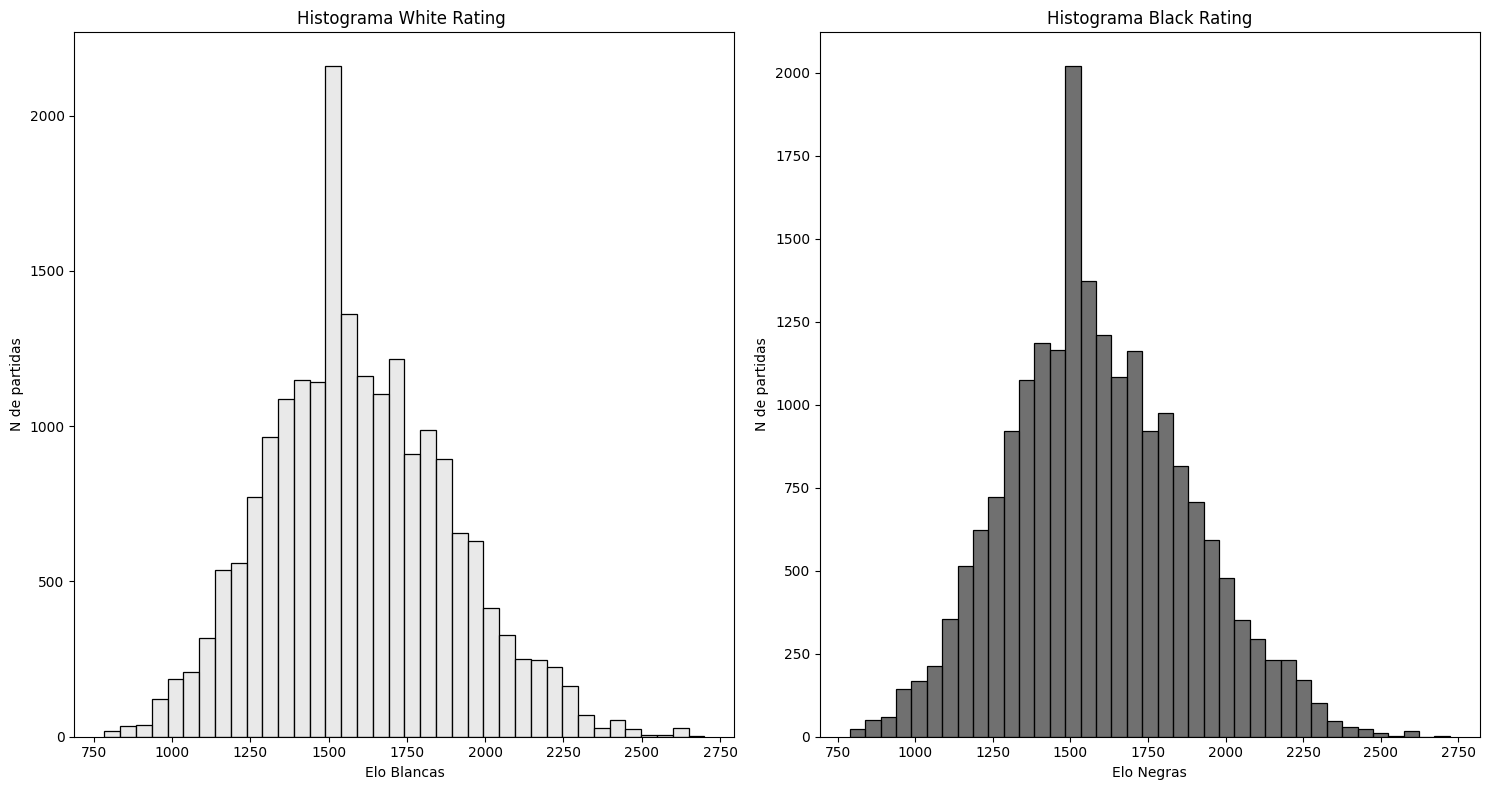

In [26]:
fig, ax = plt.subplots(1,2, figsize=(15,8))



ax[0].set_title("Histograma White Rating ")
ax[0].set_ylabel("N de partidas")
ax[0].set_xlabel("Elo Blancas")
sns.histplot(df, x="white_rating", binwidth=50, color=greys_palette[0], ax=ax[0])


ax[1].set_title("Histograma Black Rating")
ax[1].set_ylabel("N de partidas")
ax[1].set_xlabel("Elo Negras")
sns.histplot(df, x="black_rating", binwidth=50, color=greys_palette[3], ax=ax[1])

plt.tight_layout()
plt.show()


<Axes: title={'center': 'Grafico de densidad del elo superpuesto'}, xlabel='Elo', ylabel='N de partidas'>

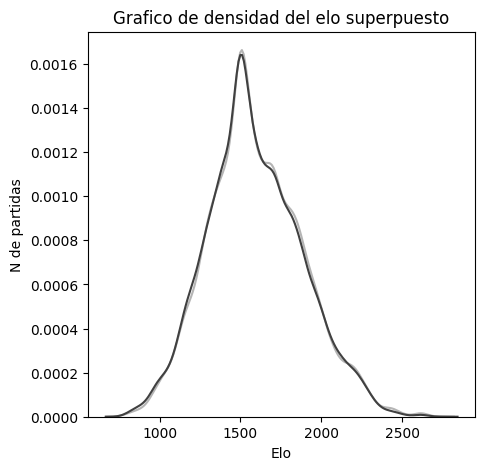

In [27]:
fig, ax = plt.subplots(figsize=(5,5))


ax.set_title("Grafico de densidad del elo superpuesto")
ax.set_ylabel("N de partidas")
ax.set_xlabel("Elo")

sns.kdeplot(df, x="white_rating", color=greys_palette[1], ax=ax,fill=False)
sns.kdeplot(df, x="black_rating", color=greys_palette[3], ax=ax, fill=False)

## 3. Análisis de aperturas



### Aperturas más frecuentes

- Identificar aperturas más usadas (opening_eco, opening_name)


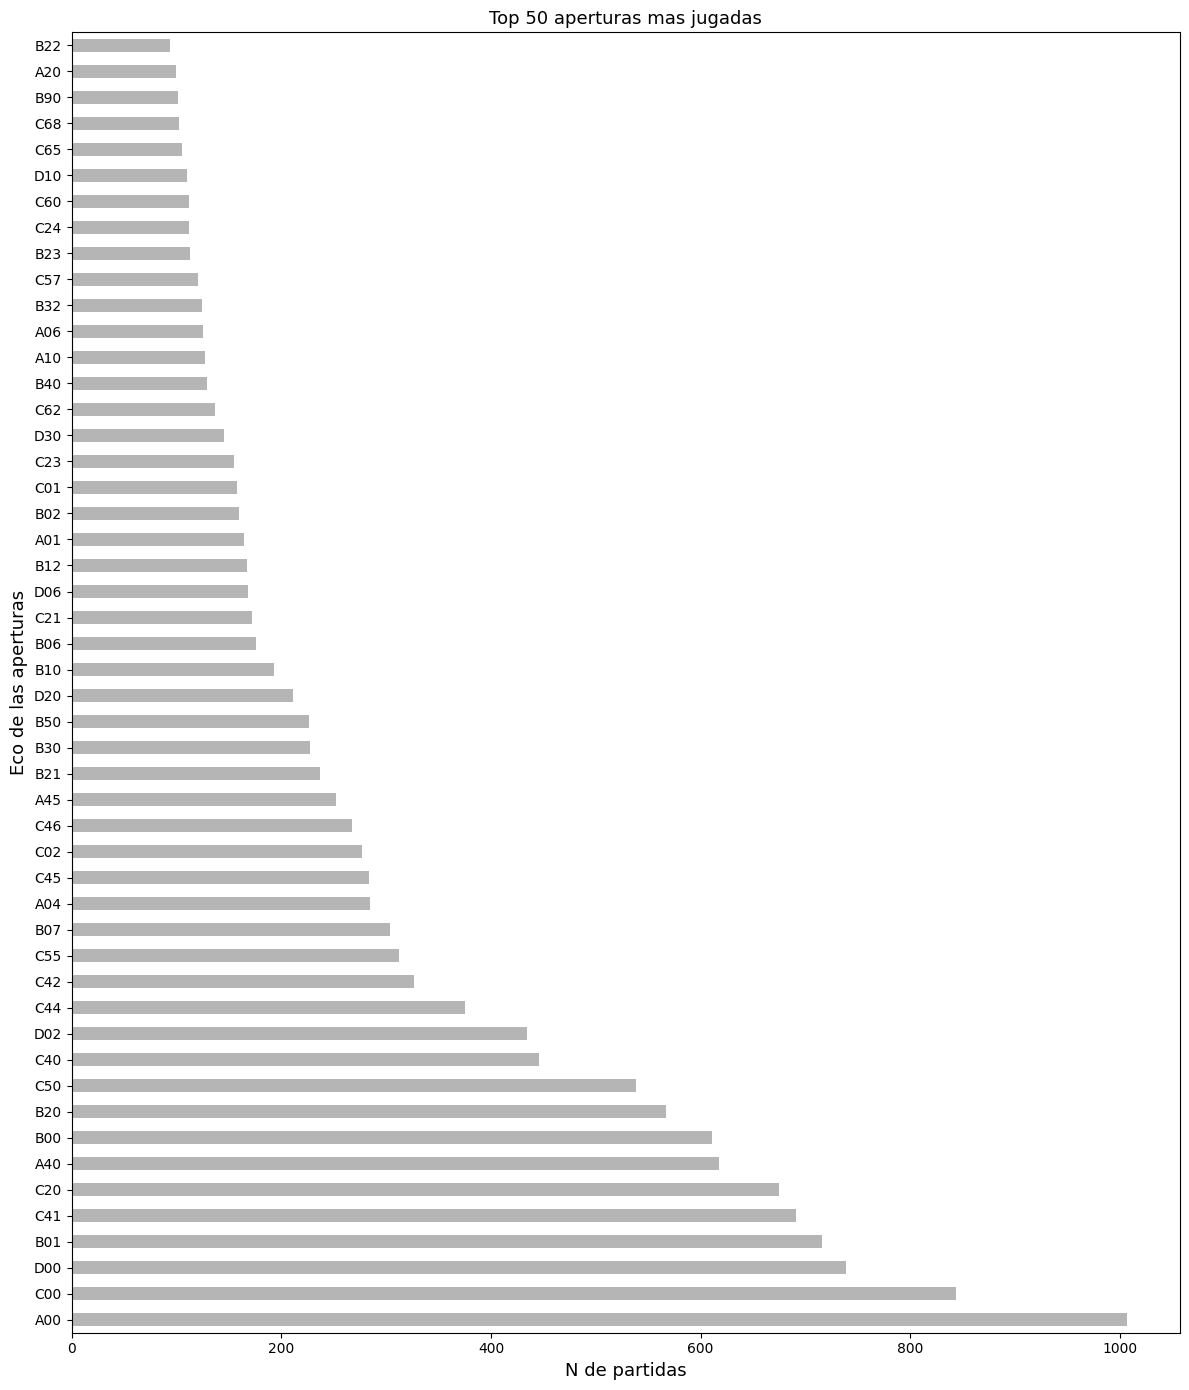

In [28]:
oppening_eco = df["opening_eco"].value_counts().head(50)

fig, ax = plt.subplots(figsize=(12,14))

oppening_eco.plot(kind="barh", ax=ax, color=greys_palette[1])

ax.set_title("Top 50 aperturas mas jugadas", fontsize=13)
ax.set_xlabel("N de partidas", fontsize=13)
ax.set_ylabel("Eco de las aperturas", fontsize=13)

plt.tight_layout()
plt.show()


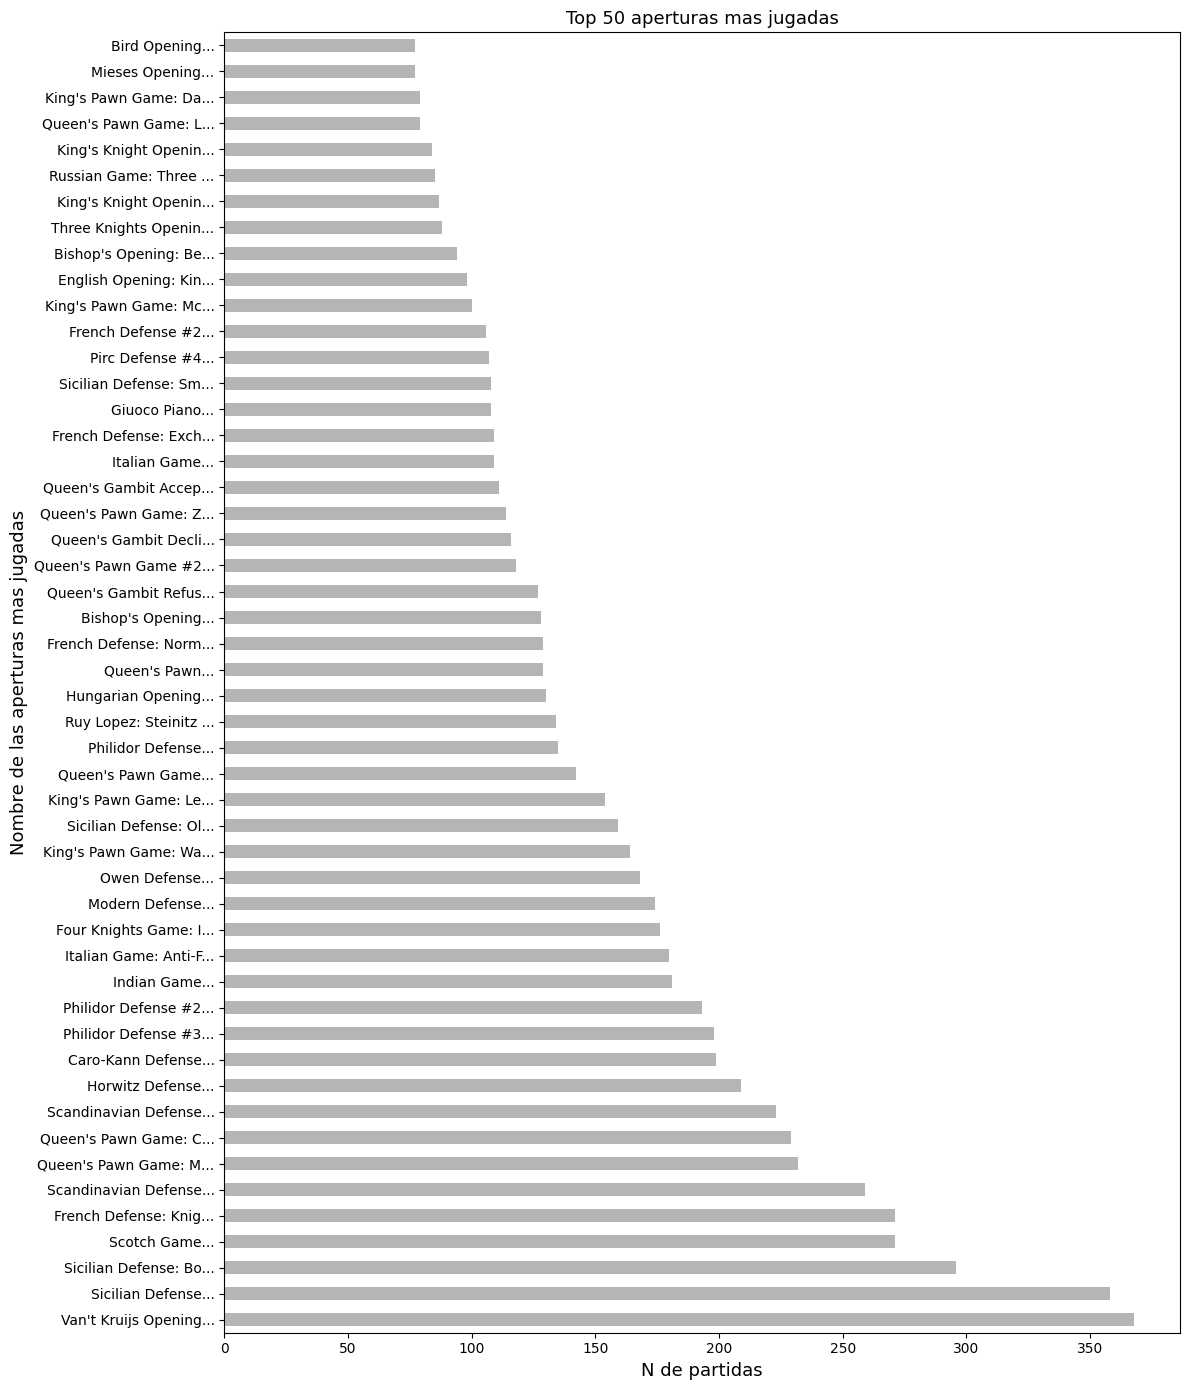

In [29]:
oppening_name= df["opening_name"].value_counts().head(50)
oppening_name.index = oppening_name.index.str.slice(0, 20) + "..."

fig, ax = plt.subplots(figsize=(12,14))

oppening_name.plot(kind="barh", ax=ax, color=greys_palette[1])
ax.set_title("Top 50 aperturas mas jugadas", fontsize=13)
ax.set_xlabel("N de partidas", fontsize=13)
ax.set_ylabel("Nombre de las aperturas mas jugadas", fontsize=13)

plt.tight_layout()
plt.show()


### Éxito de aperturas

- Evaluar si hay aperturas que favorecen a blancas o negras

In [30]:
filtro = df["winner"] != "draw"

tabla_cruzada = pd.crosstab(
    df.loc[filtro, "winner"],
    df.loc[filtro, "opening_eco"]
)



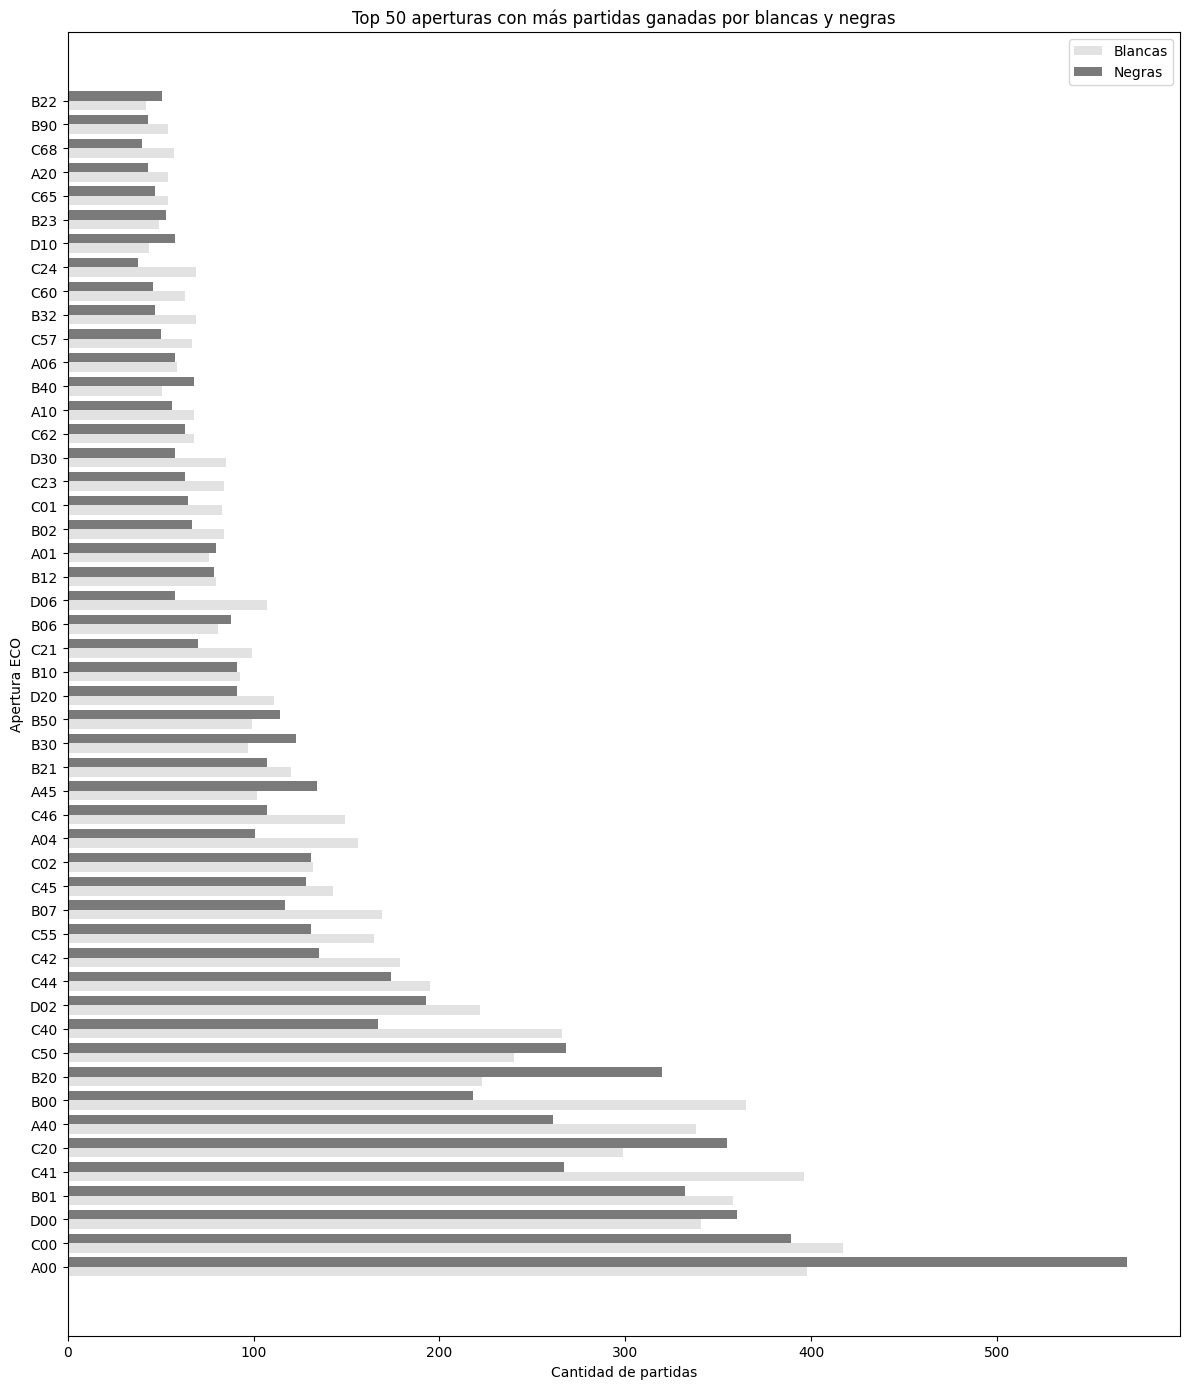

In [31]:
top_50_aperturas = tabla_cruzada.sum(axis=0).sort_values(ascending=False).head(50).index
tabla_top50 = tabla_cruzada[top_50_aperturas]

colores = {"white": greys_palette[0], "black": greys_palette[2]}
y = np.arange(len(tabla_top50.columns))
height  = 0.4

fig, ax = plt.subplots(figsize=(12,14))
ax.barh(y - height/2, tabla_top50.loc["white"], height, color=colores["white"], label="Blancas")
ax.barh(y + height/2, tabla_top50.loc["black"], height, color=colores["black"], label="Negras")

ax.set_ylabel("Apertura ECO")
ax.set_xlabel("Cantidad de partidas")
ax.set_title("Top 50 aperturas con más partidas ganadas por blancas y negras")
ax.set_yticks(y)
ax.set_yticklabels(tabla_top50.columns)


ax.legend()
plt.tight_layout()
plt.show()

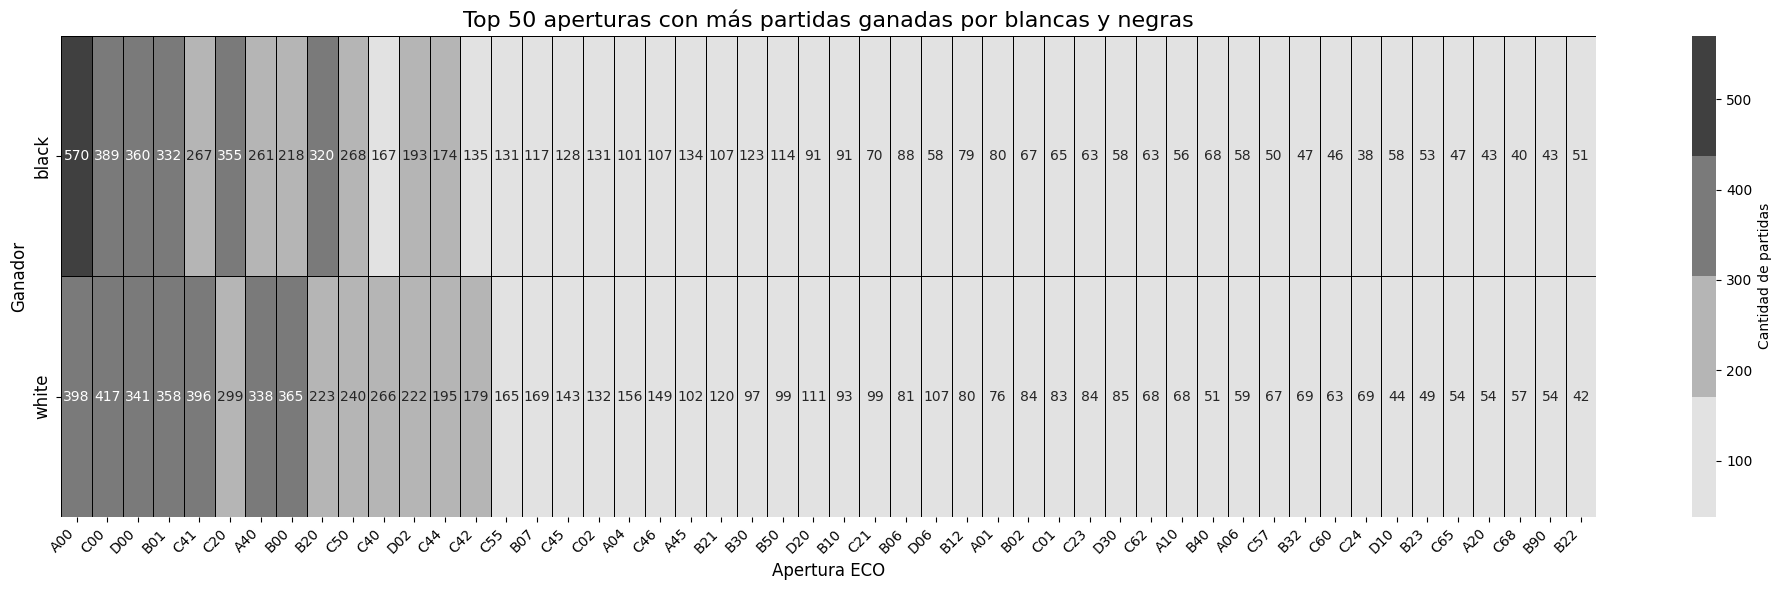

In [32]:
top_50_aperturas = tabla_cruzada.sum(axis=0).sort_values(ascending=False).head(50).index
tabla_top50 = tabla_cruzada[top_50_aperturas]

plt.figure(figsize=(20,6))

sns.heatmap(
    tabla_top50, 
    annot=True,                
    fmt="d",                   
    cmap=greys_palette,              
    linewidths=0.5,           
    linecolor="black",           
    cbar_kws={'label': 'Cantidad de partidas'})

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=12)
plt.title("Top 50 aperturas con más partidas ganadas por blancas y negras", fontsize=16)
plt.xlabel("Apertura ECO", fontsize=12)
plt.ylabel("Ganador", fontsize=12)
plt.tight_layout()
plt.show()

### Duracion de partidas por apertura

- Analizar si algunas aperturas llevan a partidas más cortas o largas

In [35]:
df.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [44]:
df_duration_oppening = df[["opening_eco", "turns"]].sort_values(ascending=False)



TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'